<h2>name=>Name of the Player;
nationality=>Nationality of Player
position=>Position that the player plays
overall=>Players Overall Rating
age=>Age of the Player
hits=>The hits of the player
potential=>The Potential for growth of the player
team=>The team that the player plays for</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import sqlite3

sns.set(rc={'figure.figsize': [17, 17]}, font_scale=1.2)

In [8]:
df=pd.read_csv('FIFA-21 Complete.csv',sep=';')
df


player_id               name  nationality  position  overall  age  \
0         158023       Lionel Messi    Argentina  ST|CF|RW       94   33   
1          20801  Cristiano Ronaldo     Portugal     ST|LW       93   35   
2         190871          Neymar Jr       Brazil    CAM|LW       92   28   
3         203376    Virgil van Dijk  Netherlands        CB       91   29   
4         200389          Jan Oblak     Slovenia        GK       91   27   
...          ...                ...          ...       ...      ...  ...   
17976     256093        Jaime Ortíz      Ecuador        ST       56   21   
17977     256088   Michael Carcelén      Ecuador        CM       56   23   
17978     256074        Davide Luzi    Venezuela        ST       56   18   
17979     256073    Sergio Sulbarán    Venezuela        RW       56   22   
17980     256072          Luis Peña    Venezuela        CM       56   18   

       hits  potential                         team  
0       299         94                FC Barcelona   
1       276         93                    Juventus   
2       186         92         Paris Saint-Germain   
3       127         92                   Liverpool   
4        47         93             Atlético Madrid   
...     ...        ...                          ...  
17976     0         64    Sociedad Deportiva Aucas   
17977     0         64  Club Deportivo El Nacional   
17978     1         68          Zamora Fútbol Club   
17979     0         62          Zamora Fútbol Club   
17980     0         69          Zamora Fútbol Club   

[17981 rows x 9 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2   nationality  17981 non-null  object
 3   position     17981 non-null  object
 4   overall      17981 non-null  int64 
 5   age          17981 non-null  int64 
 6   hits         17981 non-null  int64 
 7   potential    17981 non-null  int64 
 8   team         17981 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


# Analysis

In [10]:
df['name'].unique()

array(['Lionel Messi', 'Cristiano Ronaldo', 'Neymar Jr', ...,
       'Davide Luzi', 'Sergio Sulbarán', 'Luis Peña'], dtype=object)

In [11]:
df['name'].nunique()

17701

<b> the name count is 17701<b>

In [12]:
df['name'].value_counts()

Paulinho            8
Danilo              5
Douglas             4
Adama Traoré        4
Diego Rodríguez     4
                   ..
Dong Xuesheng       1
Andrej Kadlec       1
Marco Essimi        1
Fernando Lazcano    1
Filip Kurto         1
Name: name, Length: 17701, dtype: int64

<b> the most name is Paulinho & Danilo </b>

In [13]:
df['nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Netherlands', 'Slovenia',
       'Belgium', 'Poland', 'Egypt', 'Senegal', 'Germany', 'France',
       'England', 'Croatia', 'Uruguay', 'Spain', 'Gabon', 'Italy',
       'Korea Republic', 'Costa Rica', 'Denmark', 'Slovakia', 'Scotland',
       'Morocco', 'Algeria', 'Bosnia & Herzegovina', 'Switzerland',
       'Cameroon', 'Serbia', 'Hungary', 'Wales', 'Sweden', 'Nigeria',
       'Ghana', 'Colombia', 'Greece', 'Chile', 'Togo', 'lbania',
       'Austria', 'Mexico', 'Montenegro', 'Ivory Coast', 'Finland',
       'Czech Republic', 'Norway', 'Guinea', 'Venezuela', 'DR Congo',
       'Russia', 'Ecuador', 'Jamaica', 'Mali', 'Israel',
       'Central African Rep.', 'Ermenia', 'Ukraine', 'Turkey', 'Kosovo',
       'United States', 'Cape Verde', 'Republic of Ireland', 'Australia',
       'Iceland', 'Northern Ireland', 'Romania', 'China PR', 'Japan',
       'North Macedonia', 'Paraguay', 'Tunisia', 'Syria',
       'Dominican Republic', 'Tanzania', 'Angola

In [14]:
df['nationality'].nunique()

162

<b> the nationality count is 162</b>

In [15]:
df['nationality'].value_counts()

England                1496
Germany                1138
Spain                  1055
Argentina               970
France                  948
                       ... 
Tanzania                  1
Guatemala                 1
Oman                      1
Rwanda                    1
São Tomé & Príncipe       1
Name: nationality, Length: 162, dtype: int64

<b> the most nationality is England &Germany &Spain </b>                                               

In [16]:
df['position'].unique()

array(['ST|CF|RW', 'ST|LW', 'CAM|LW', 'CB', 'GK', 'CM|CAM', 'ST', 'ST|RW',
       'LW', 'ST|RW|LW', 'CDM|CM', 'ST|CF|LW', 'CM', 'RW|LW', 'CF', 'CDM',
       'ST|LM', 'ST|CF', 'CM|CAM|RW', 'RB|CDM|CM', 'CAM|CF', 'LM|CF',
       'RM|CM|CAM', 'RM|LM|CAM', 'LB', 'CAM|RW', 'CB|CDM', 'RM|RW',
       'LM|CF|LW', 'RM|LM|CM', 'ST|CAM|CF', 'RB', 'CDM|CM|CAM',
       'ST|RM|CAM', 'LB|LM|CM', 'RM|LM|RW', 'CM|CAM|CF', 'RM|CM',
       'CM|CAM|LW', 'RM|CAM|RW', 'LB|CB', 'RM|CAM', 'RM|LM|LW',
       'LM|CM|CAM', 'CAM|CF|LW', 'LB|LM', 'LM|RW|LW', 'RB|LB|CB', 'RM|LM',
       'ST|CAM', 'LWB|LM|LW', 'LM', 'RM', 'RM|CF|RW', 'RM|LM|CF',
       'RB|RM|RW', 'LB|CB|CDM', 'CAM|RW|LW', 'LM|LW', 'CDM|LM|CM',
       'RB|LB|RM', 'RWB|RB|RW', 'CB|CDM|CM', 'RB|CB', 'LB|LW', 'ST|RM|RW',
       'ST|RM', 'LM|CAM', 'RM|CF', 'RB|CM', 'RWB|RM|RW', 'RB|RM',
       'RM|RW|LW', 'LM|CAM|LW', 'LM|CM', 'ST|RM|LM', 'RWB|RB|LB|RW',
       'LB|LWB|LW', 'RW', 'CAM', 'RB|LB|CM', 'ST|LM|CF', 'ST|CM|CAM',
       'CF|RW|LW', 'CF|LW', 'S

In [17]:
df['position'].nunique()

232

<b> the position count is 232</b>

In [18]:
df['position'].value_counts()

CB                  2296
GK                  1884
ST                  1757
CDM|CM              1546
LB                   695
                    ... 
RWB|CB|LWB|RW|LW       1
CB|CF                  1
CDM|CAM|CF             1
ST|RB|CM               1
LM|CM|CF               1
Name: position, Length: 232, dtype: int64

<b> the most postion is CB=>cornerback and GK=> and  ST</B>

In [20]:
df['overall'].describe()

count    17981.000000
mean        67.274345
std          5.924392
min         56.000000
25%         63.000000
50%         67.000000
75%         71.000000
max         94.000000
Name: overall, dtype: float64

In [21]:
df['age'].describe()

count    17981.000000
mean        26.311440
std          4.556077
min         17.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         43.000000
Name: age, dtype: float64

In [22]:
df['hits'].describe()

count    17981.000000
mean         2.689450
std         10.846286
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        371.000000
Name: hits, dtype: float64

In [23]:
df['hits'].describe()

count    17981.000000
mean         2.689450
std         10.846286
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        371.000000
Name: hits, dtype: float64

In [24]:
df['potential'].describe()

count    17981.000000
mean        71.738057
std          5.961968
min         57.000000
25%         67.000000
50%         71.000000
75%         76.000000
max         95.000000
Name: potential, dtype: float64

In [25]:
df['team'].unique()

array(['FC Barcelona ', 'Juventus ', 'Paris Saint-Germain ', 'Liverpool ',
       'Atlético Madrid ', 'Manchester City ', 'FC Bayern München ',
       'Real Madrid ', 'Chelsea ', 'Tottenham Hotspur ', 'Napoli ',
       'Manchester United ', 'Arsenal ', 'Inter ', 'Lazio ',
       'Valencia CF ', 'Borussia Dortmund ', 'RB Leipzig ',
       'Leicester City ', 'Ajax ', 'Borussia Mönchengladbach ',
       'Atalanta ', 'Milan ', 'Real Betis ', 'SL Benfica ', 'RC Celta ',
       'Guangzhou Evergrande Taobao FC ', 'Bayer 04 Leverkusen ',
       'FC Porto ', 'Olympique Lyonnais ', 'AS Monaco Football Club SA ',
       'Shanghai SIPG FC ', 'Roma ', 'Sevilla FC ', 'Cagliari ',
       'Torino ', 'Wolverhampton Wanderers ', 'Grêmio ',
       'Atlético Mineiro ', 'Real Sociedad ', 'Getafe CF ',
       'TSG 1899 Hoffenheim ', 'Eintracht Frankfurt ',
       'Medipol Basaksehir FK ', 'Olympique de Marseille ', 'Everton ',
       'Crystal Palace ', 'VfL Wolfsburg ', 'Athletic Club ',
       'Fenerbahçe 

In [26]:
df['team'].nunique()

713

<b> the team count 713<b>

In [27]:
df['team'].value_counts()

Free Agents          211
River Plate           35
Valencia CF           33
Leicester City        33
Real Madrid           33
                    ... 
Cork City              9
Beijing Renhe FC       9
Waterford FC           8
Finn Harps             7
UCD AFC                1
Name: team, Length: 713, dtype: int64

<b>the most team is Free Agents and River Plate</b>

<B> check missing value <B>

In [30]:
df.isnull().sum() * 100 / 17981

player_id      0.0
name           0.0
nationality    0.0
position       0.0
overall        0.0
age            0.0
hits           0.0
potential      0.0
team           0.0
dtype: float64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2   nationality  17981 non-null  object
 3   position     17981 non-null  object
 4   overall      17981 non-null  int64 
 5   age          17981 non-null  int64 
 6   hits         17981 non-null  int64 
 7   potential    17981 non-null  int64 
 8   team         17981 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [53]:
df.pivot_table(index='name',columns='nationality',aggfunc='count',values='potential')

nationality       Afghanistan  Algeria  Angola  Antigua & Barbuda  Argentina  \
name                                                                           
?tefan Baiaram            NaN      NaN     NaN                NaN        NaN   
?tefan Târnovanu          NaN      NaN     NaN                NaN        NaN   
?tefan Vladoiu            NaN      NaN     NaN                NaN        NaN   
AJ Leitch-Smith           NaN      NaN     NaN                NaN        NaN   
Aapo Halme                NaN      NaN     NaN                NaN        NaN   
...                       ...      ...     ...                ...        ...   
Özgür Aktas               NaN      NaN     NaN                NaN        NaN   
Özgür Çek                 NaN      NaN     NaN                NaN        NaN   
Ørjan Nyland              NaN      NaN     NaN                NaN        NaN   
Øyvind Alseth             NaN      NaN     NaN                NaN        NaN   
Šime Vrsaljko             NaN      NaN     NaN                NaN        NaN   

nationality       Australia  Austria  Azerbaijan  Bahrain  Barbados  ...  \
name                                                                 ...   
?tefan Baiaram          NaN      NaN         NaN      NaN       NaN  ...   
?tefan Târnovanu        NaN      NaN         NaN      NaN       NaN  ...   
?tefan Vladoiu          NaN      NaN         NaN      NaN       NaN  ...   
AJ Leitch-Smith         NaN      NaN         NaN      NaN       NaN  ...   
Aapo Halme              NaN      NaN         NaN      NaN       NaN  ...   
...                     ...      ...         ...      ...       ...  ...   
Özgür Aktas             NaN      NaN         NaN      NaN       NaN  ...   
Özgür Çek               NaN      NaN         NaN      NaN       NaN  ...   
Ørjan Nyland            NaN      NaN         NaN      NaN       NaN  ...   
Øyvind Alseth           NaN      NaN         NaN      NaN       NaN  ...   
Šime Vrsaljko           NaN      NaN         NaN      NaN       NaN  ...   

nationality       United Arab Emirates  United States  Uruguay  Uzbekistan  \
name                                                                         
?tefan Baiaram                     NaN            NaN      NaN         NaN   
?tefan Târnovanu                   NaN            NaN      NaN         NaN   
?tefan Vladoiu                     NaN            NaN      NaN         NaN   
AJ Leitch-Smith                    NaN            NaN      NaN         NaN   
Aapo Halme                         NaN            NaN      NaN         NaN   
...                                ...            ...      ...         ...   
Özgür Aktas                        NaN            NaN      NaN         NaN   
Özgür Çek                          NaN            NaN      NaN         NaN   
Ørjan Nyland                       NaN            NaN      NaN         NaN   
Øyvind Alseth                      NaN            NaN      NaN         NaN   
Šime Vrsaljko                      NaN            NaN      NaN         NaN   

nationality       Venezuela  Vietnam  Wales  Zambia  Zimbabwe  lbania  
name                                                                   
?tefan Baiaram          NaN      NaN    NaN     NaN       NaN     NaN  
?tefan Târnovanu        NaN      NaN    NaN     NaN       NaN     NaN  
?tefan Vladoiu          NaN      NaN    NaN     NaN       NaN     NaN  
AJ Leitch-Smith         NaN      NaN    NaN     NaN       NaN     NaN  
Aapo Halme              NaN      NaN    NaN     NaN       NaN     NaN  
...                     ...      ...    ...     ...       ...     ...  
Özgür Aktas             NaN      NaN    NaN     NaN       NaN     NaN  
Özgür Çek               NaN      NaN    NaN     NaN       NaN     NaN  
Ørjan Nyland            NaN      NaN    NaN     NaN       NaN     NaN  
Øyvind Alseth           NaN      NaN    NaN     NaN       NaN     NaN  
Šime Vrsaljko           NaN      NaN    NaN     NaN       NaN     NaN  

[17701 rows x 162 

# Visualization

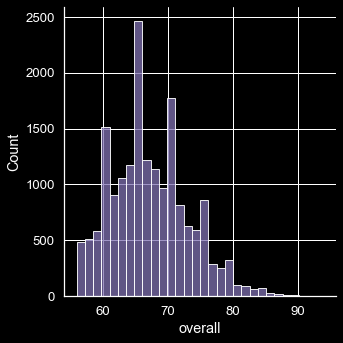

In [55]:
sns.displot(df['overall'], kde=False, bins=30, color='m')

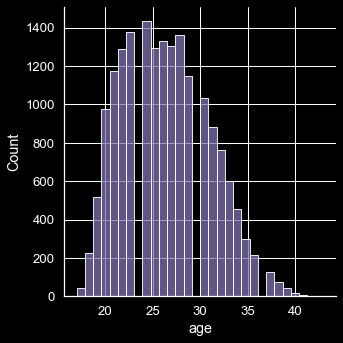

In [56]:
sns.displot(df['age'], kde=False, bins=30, color='m')

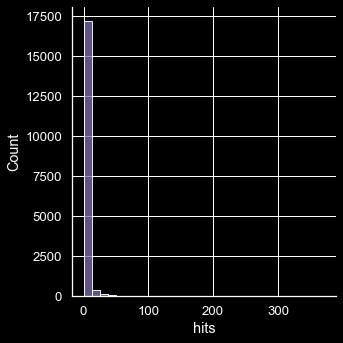

In [57]:
sns.displot(df['hits'], kde=False, bins=30, color='m')

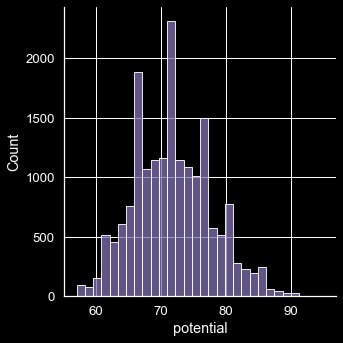

In [58]:

sns.displot(df['potential'], kde=False, bins=30, color='m')

<AxesSubplot:xlabel='age', ylabel='Density'>

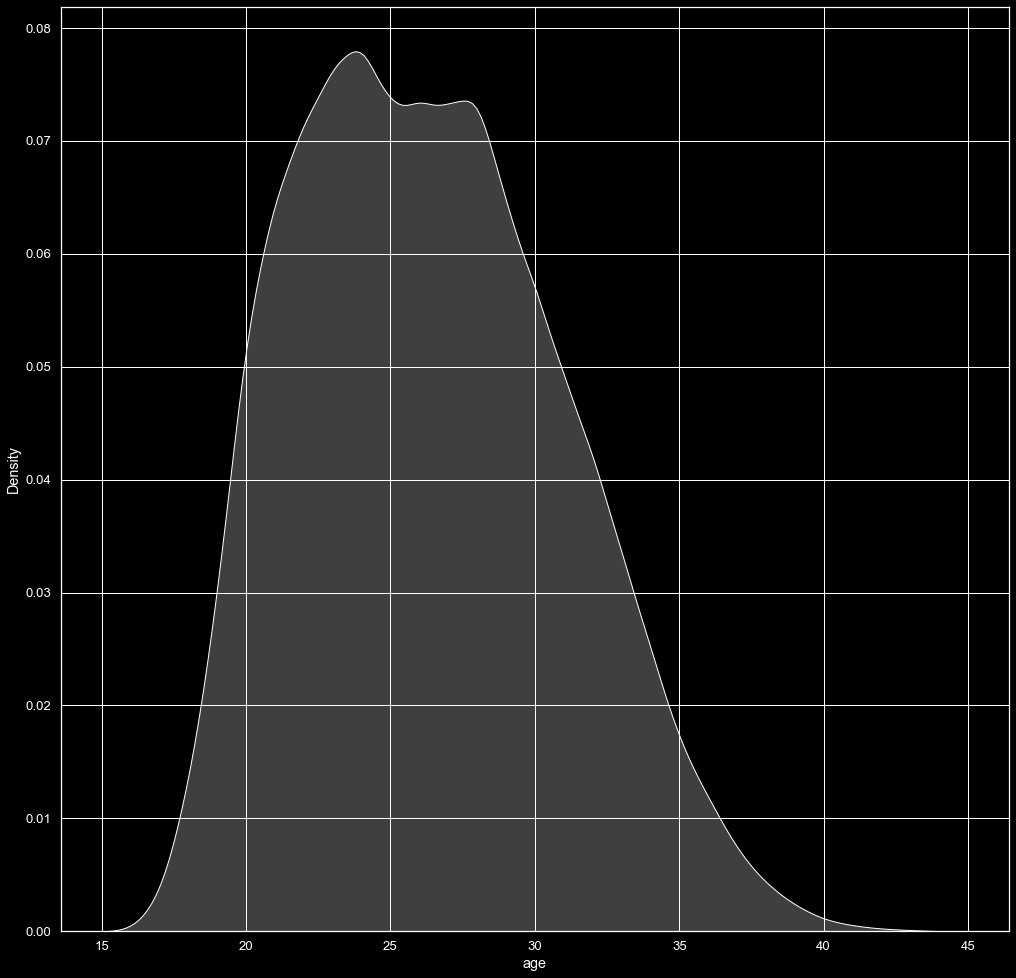

In [63]:
sns.kdeplot(df['age'], shade=True, color='w')

<AxesSubplot:xlabel='potential', ylabel='Density'>

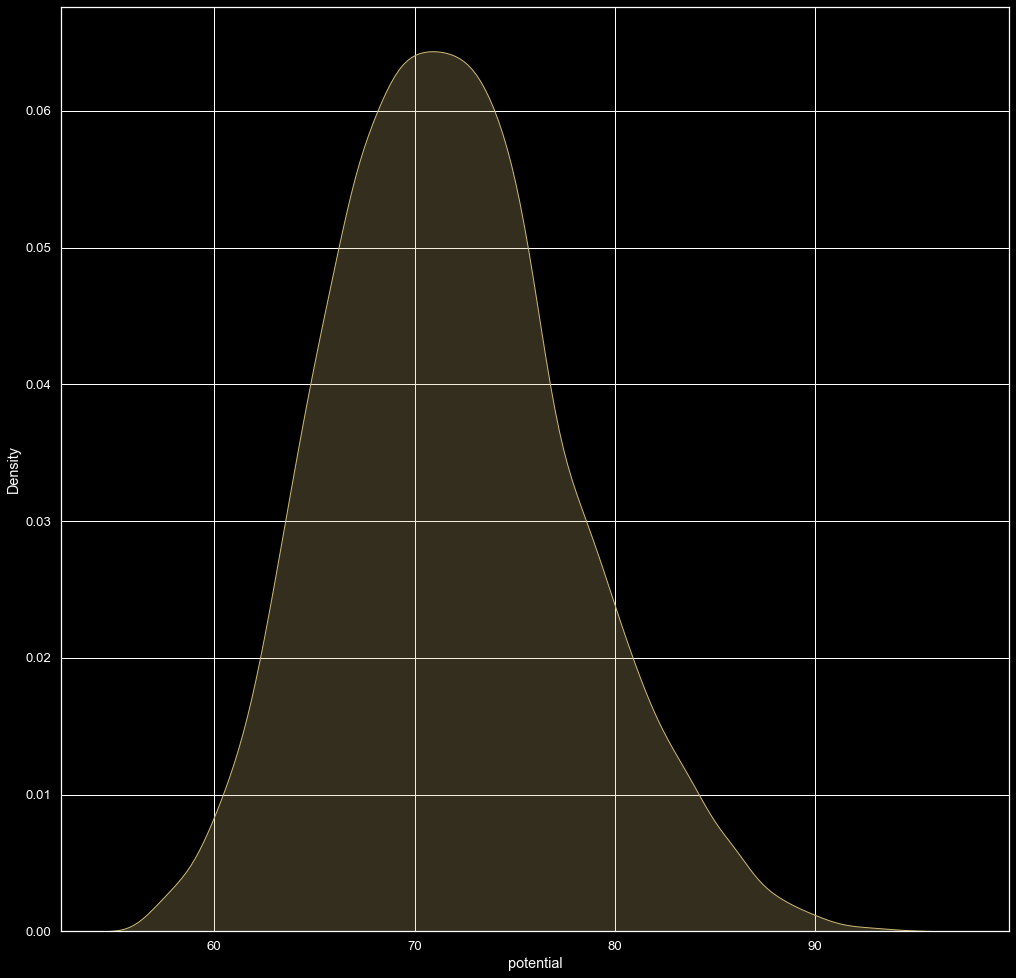

In [66]:
sns.kdeplot(df['potential'], shade=True, color='y')

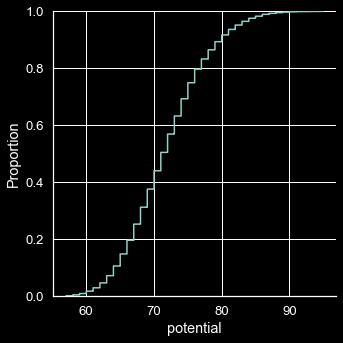

In [68]:
sns.displot(data=df, x="potential", kind="ecdf")

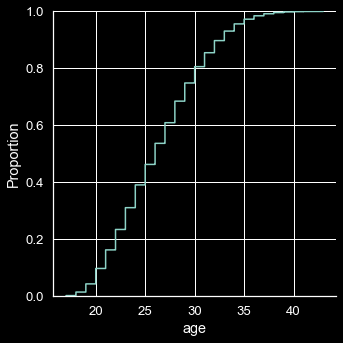

In [69]:
sns.displot(data=df, x="age", kind="ecdf")

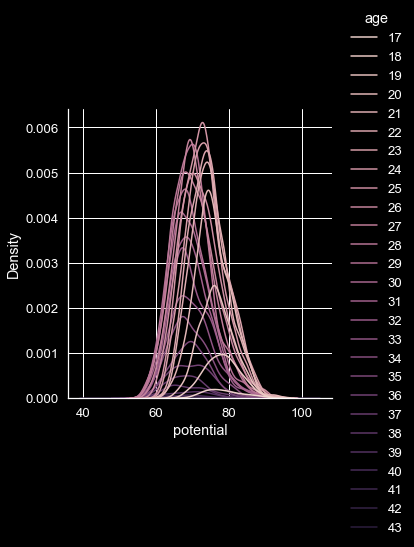

In [73]:
sns.displot(data=df, x="potential", hue="age", kind="kde")

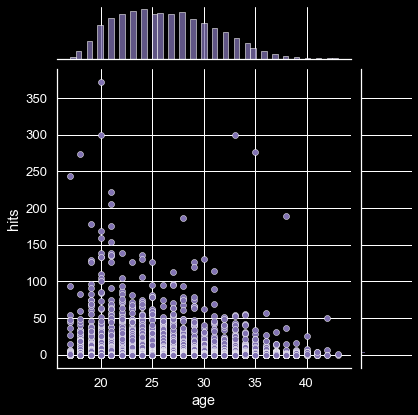

In [74]:
sns.jointplot(x='age', y='hits', data=df, color='m')

<b>The more age decreases, the harm increases<b>

<AxesSubplot:xlabel='count', ylabel='name'>

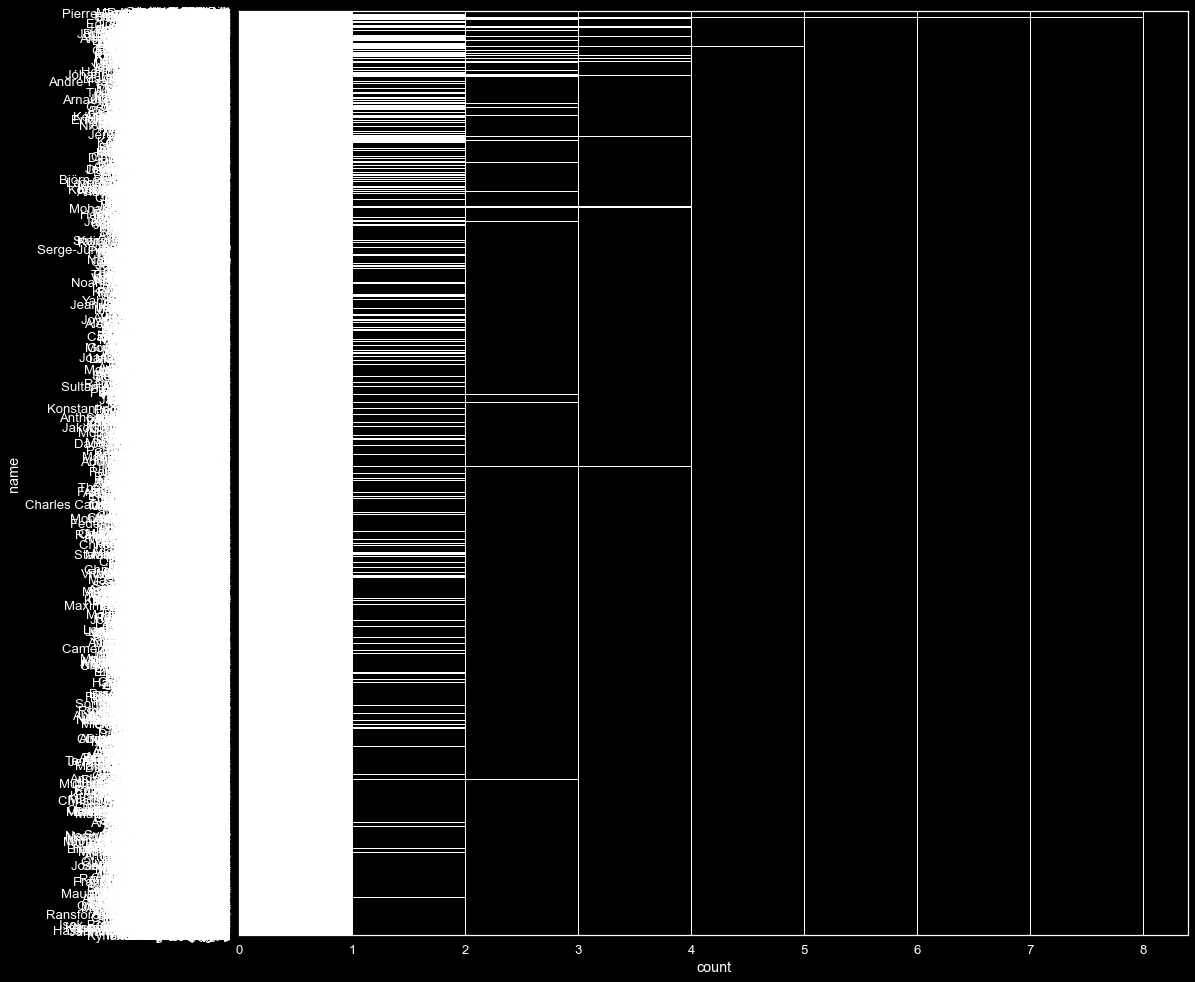

In [75]:
#sns.countplot(y='name', data=df, palette='viridis')

<AxesSubplot:xlabel='count', ylabel='nationality'>

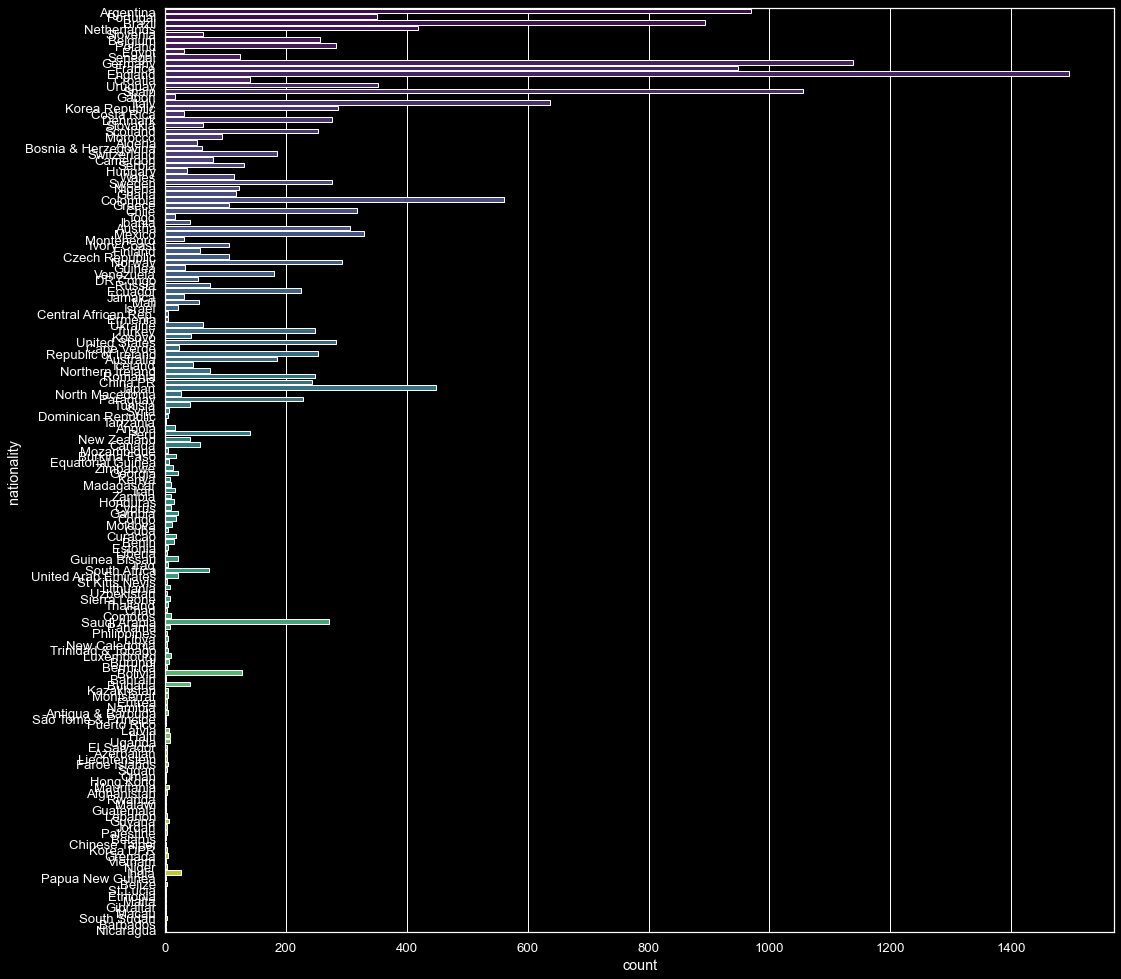

In [76]:
#sns.countplot(y='nationality', data=df, palette='viridis')

<AxesSubplot:xlabel='count', ylabel='position'>

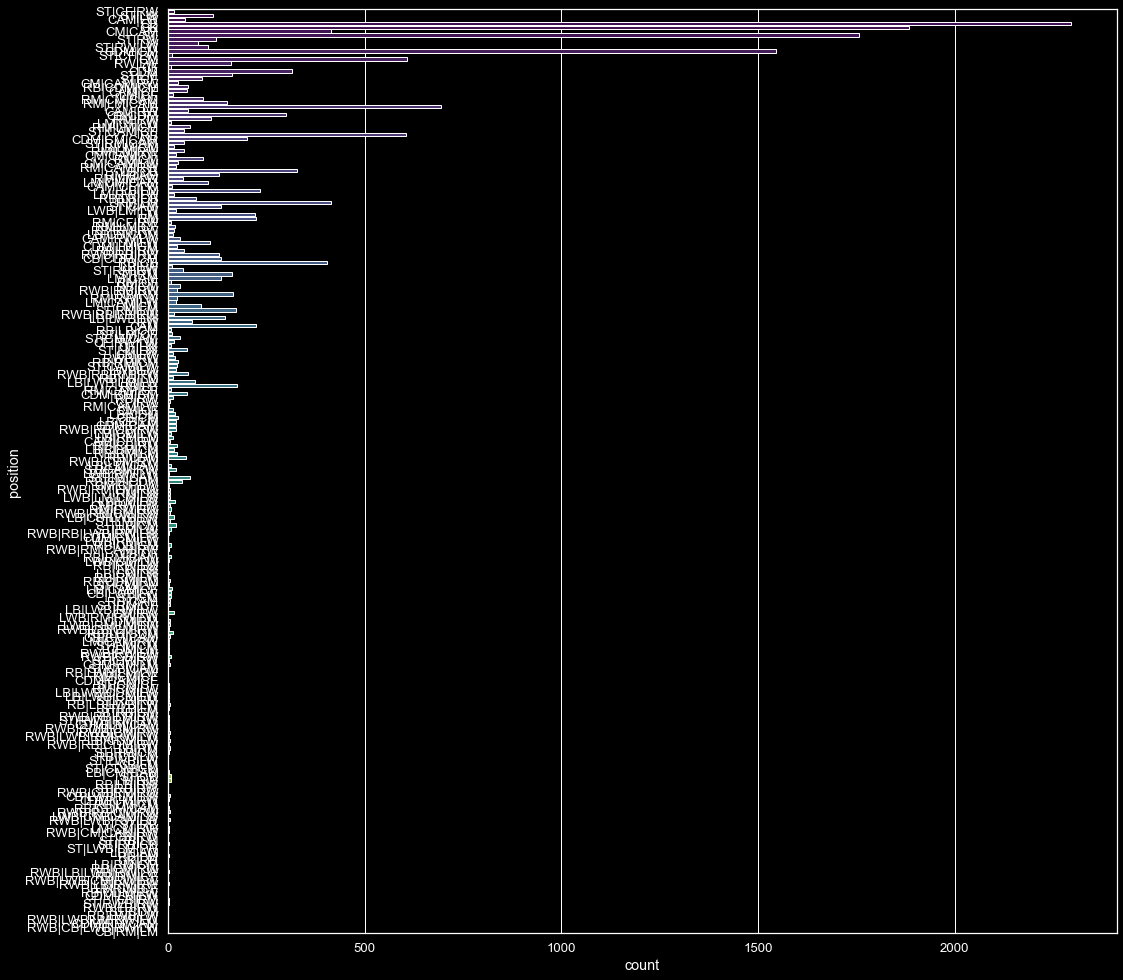

In [77]:
#sns.countplot(y='position', data=df, palette='viridis')

<AxesSubplot:xlabel='count', ylabel='team'>

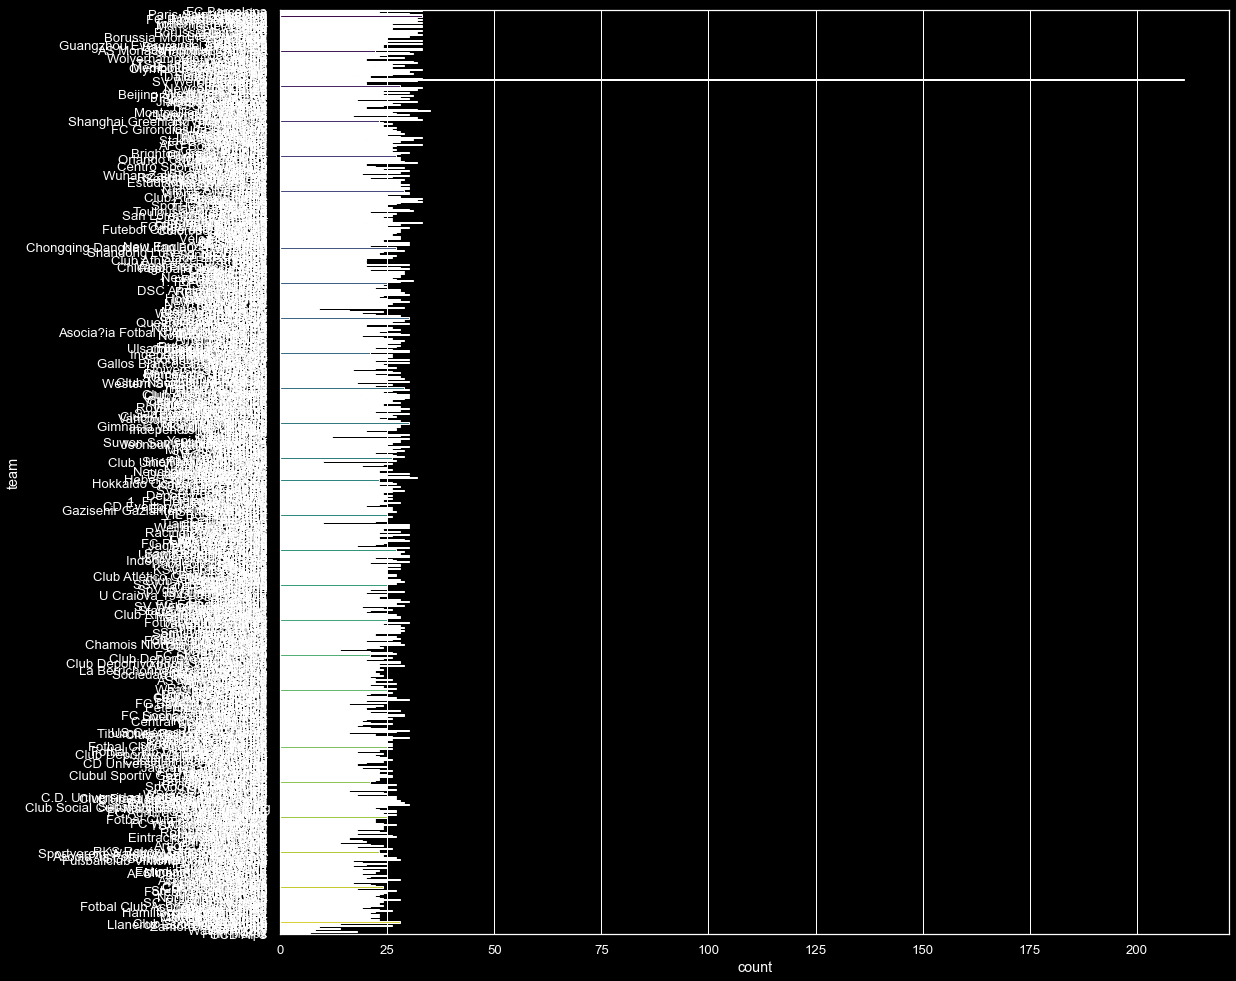

In [78]:
#sns.countplot(y='team', data=df, palette='viridis')

In [80]:
df_corr = df.corr()
df_corr

player_id   overall       age      hits  potential
player_id   1.000000 -0.392988 -0.726628 -0.043335   0.098938
overall    -0.392988  1.000000  0.341995  0.378900   0.638915
age        -0.726628  0.341995  1.000000 -0.073467  -0.374716
hits       -0.043335  0.378900 -0.073467  1.000000   0.429509
potential   0.098938  0.638915 -0.374716  0.429509   1.000000

<AxesSubplot:>

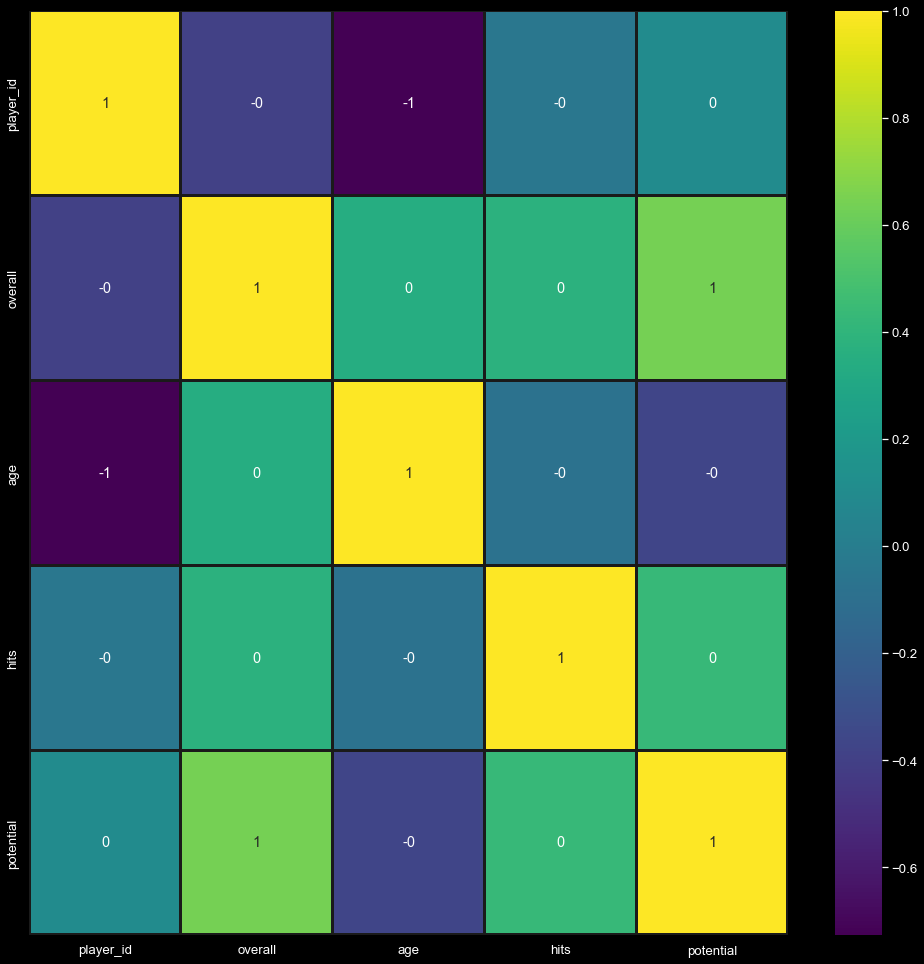

In [81]:
sns.heatmap(df_corr, cmap='viridis', linecolor='k', linewidths=2, annot=True, fmt='0.0f')

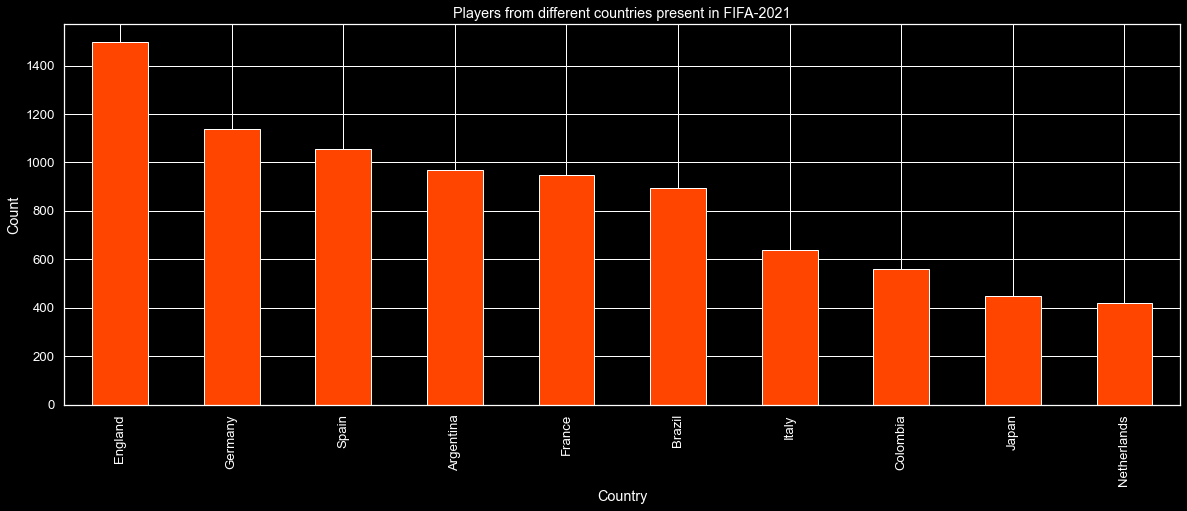

In [32]:
plt.style.use('dark_background') #top 50 nations that the players represent in FIFA 2021
plt.figure(figsize = (20,7))
df['nationality'].value_counts().head(10).plot.bar(color = 'orangered')
plt.title('Players from different countries present in FIFA-2021')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

C:\Users\ELPOP\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


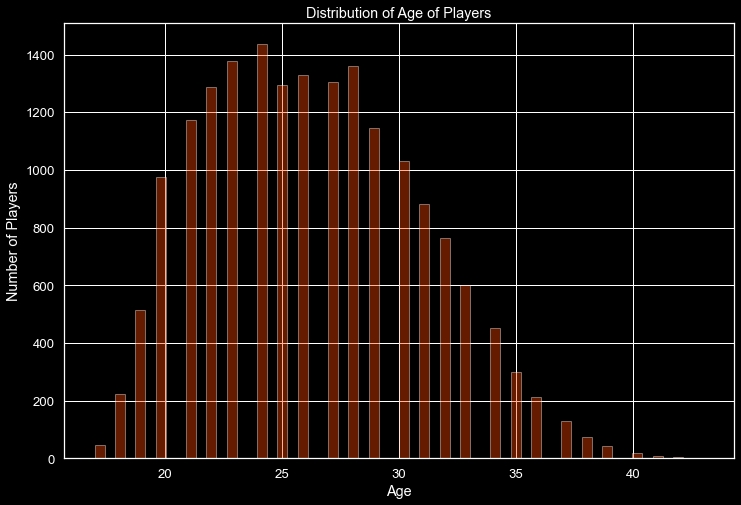

In [33]:

plt.style.use('dark_background') #checking the age distribution of the players in FIFA-2021
age  = df.age
plt.figure(figsize = (12,8))
ax = sns.distplot(age,bins = 60,kde = False,color ='orangered')
ax.set_ylabel('Number of Players')
ax.set_xlabel('Age')
ax.set_title('Distribution of Age of Players')
plt.show()

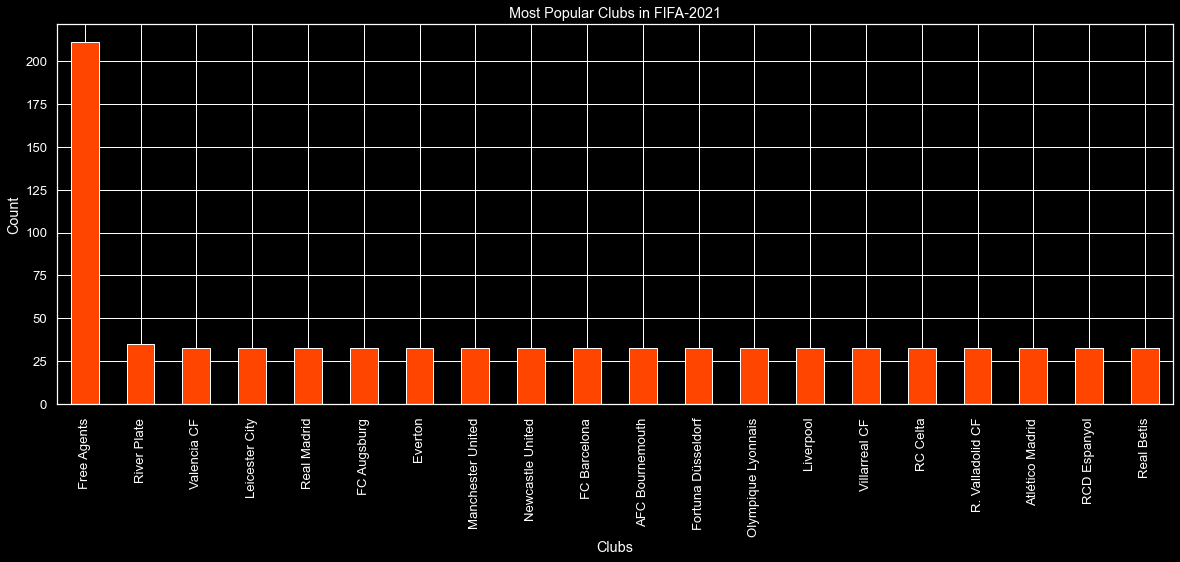

In [34]:
plt.style.use('dark_background') #popular clubs in FIFA-2021
plt.figure(figsize = (20,7))
df['team'].value_counts().head(20).plot.bar(color = 'orangered')
plt.title('Most Popular Clubs in FIFA-2021')
plt.xlabel('Clubs')
plt.ylabel('Count')
plt.show()

In [35]:
df.sort_values('age', ascending = True)[['name', 'age', 'team', 'nationality']].head(10) #The 10 youngest players present in the game

name  age                             team nationality
1637      Eduardo Camavinga   17                Stade Rennais FC       France
15008     Gabriele Plechero   17                      Cittadella        Italy
14915         Jayden Nelson   17                      Toronto FC       Canada
17075    Tom Dickson-Peters   17                    Norwich City     Scotland
17066         Elias Damergy   17                Stade Rennais FC      Tunisia
17062          Matías Arezo   17       Club Atlético River Plate      Uruguay
16430           Lucas Greno   17  Club Plaza de Deportes Colonia      Uruguay
17040  Simon Ngapandouetnbu   17          Olympique de Marseille     Cameroon
17035          Fidel Ambríz   17                       Club León       Mexico
14928    Santiago Cartagena   17       Club Nacional de Football      Uruguay

In [36]:
df.sort_values('age', ascending = False)[['name', 'age', 'team', 'nationality']].head(10) #the top 10 oldest players present in the game

name  age                       team     nationality
13767   Hussain Omar Sulaimani   43                   Al Ahli     Saudi Arabia
12887              Leao Butrón   43         Club Alianza Lima             Peru
14977  Luis Fernando Fernández   42  Sociedad Deportiva Aucas         Colombia
222           Gianluigi Buffon   42                  Juventus            Italy
726                     Hilton   42    Montpellier Hérault SC           Brazil
4150        Cristian Lucchetti   42          Atlético Tucumán        Argentina
8060      Jean-François Gillet   41         Standard de Liège          Belgium
6914             Lee Dong Gook   41    Jeonbuk Hyundai Motors   Korea Republic
16980           Michael Gurski   41        SpVgg Unterhaching          Germany
9252           Robinson Zapata   41      Jaguares Fútbol Club         Colombia

In [37]:
df.groupby(['team'])['age'].mean().sort_values(ascending = True).head(10) #top 10 team with the youngest squad

team
UCD AFC                  21.000000
FC Groningen             22.068966
FC Nordsjælland          22.157895
FC Bayern München II     22.240000
Fortuna Sittard          22.666667
SC Heerenveen            22.869565
KRC Genk                 23.000000
RB Leipzig               23.031250
OGC Nice                 23.115385
AZ                       23.142857
Name: age, dtype: float64

In [38]:
df.groupby(['team'])['age'].mean().sort_values(ascending = False).head(10) #top 10 teams with the oldest squad

team
Beijing Renhe FC                        31.333333
Tianjin Tianhai FC                      30.700000
Mineros de Guayana                      30.333333
Júbilo Iwata                            30.250000
Chongqing Dangdai Lifan FC SWM Team     30.166667
Guangzhou R&F FC                        30.117647
Tianjin TEDA FC                         30.055556
Shanghai Greenland Shenhua FC           30.043478
Perth Glory                             30.000000
Gyeongnam FC                            29.916667
Name: age, dtype: float64

In [39]:
df[df['position'] == 'CB'][['name', 'age', 'team', 'nationality']].head(10)

name  age                  team  nationality
3     Virgil van Dijk   29            Liverpool   Netherlands
21       Sergio Ramos   34          Real Madrid         Spain
25  Kalidou Koulibaly   29               Napoli       Senegal
33              Piqué   33         FC Barcelona         Spain
34  Giorgio Chiellini   35             Juventus         Italy
37    Aymeric Laporte   26      Manchester City        France
49        Diego Godín   34                Inter       Uruguay
50       Mats Hummels   31    Borussia Dortmund       Germany
54       Thiago Silva   35  Paris Saint-Germain        Brazil
56     Milan Škriniar   25                Inter      Slovakia

In [40]:
df[df['position'] == 'ST'][['name', 'age', 'team', 'nationality']].head(10)

name  age                  team nationality
6   Robert Lewandowski   31    FC Bayern München       Poland
12       Sergio Agüero   32      Manchester City    Argentina
15          Harry Kane   27    Tottenham Hotspur      England
19         Luis Suárez   33         FC Barcelona      Uruguay
43       Ciro Immobile   30                Lazio        Italy
62         Timo Werner   24           RB Leipzig      Germany
64         Jamie Vardy   33       Leicester City      England
69        Mauro Icardi   27  Paris Saint-Germain    Argentina
72       Romelu Lukaku   27                Inter      Belgium
78      Edinson Cavani   33  Paris Saint-Germain      Uruguay

In [41]:
df[df['position'] == 'CF'][['name', 'age', 'team', 'nationality']].head(10)

name  age                         team nationality
24       Roberto Firmino   28                   Liverpool       Brazil
5732     Rodolfo Gamarra   31                 CD Cobresal     Paraguay
6213   Tsukasa Morishima   23         Sanfrecce Hiroshima        Japan
10711  Kazushi Mitsuhira   32                Oita Trinita        Japan
12977      Mehdi Zerkane   21    FC Girondins de Bordeaux       France
15919     Shunki Higashi   20         Sanfrecce Hiroshima        Japan
15972       Ren Fujimura   21  Hokkaido Consadole Sapporo        Japan
17163     Brandon Aveiro   18              Crystal Palace     Portugal

In [42]:
df[df['position'] == 'LW'][['name', 'age', 'team', 'nationality']].head(10)

name  age                team nationality
10             Sadio Mané   28          Liverpool      Senegal
58             Leroy Sané   24    Manchester City      Germany
562          Vinícius Jr.   20        Real Madrid       Brazil
773          Prazeracinho   20           Flamengo       Brazil
1009             Davidson   29  Vitória Guimarães       Brazil
1045              Córdoba   23      Athletic Club        Spain
1347      Oussama Idrissi   24                 AZ      Morocco
3397             Fernando   21   Shakhtar Donetsk       Brazil
4655  Kristoffer Peterson   25         FC Utrecht       Sweden
5277      Arthur Henrique   26     Gil Vicente FC       Brazil

Top 10 Players present in the game

In [43]:
df[['name', 'age', 'team', 'nationality']].head(10)

name  age                  team  nationality
0        Lionel Messi   33         FC Barcelona     Argentina
1   Cristiano Ronaldo   35             Juventus      Portugal
2           Neymar Jr   28  Paris Saint-Germain        Brazil
3     Virgil van Dijk   29            Liverpool   Netherlands
4           Jan Oblak   27      Atlético Madrid      Slovenia
5     Kevin De Bruyne   29      Manchester City       Belgium
6  Robert Lewandowski   31    FC Bayern München        Poland
7         Eden Hazard   29          Real Madrid       Belgium
8             Alisson   27            Liverpool        Brazil
9       Mohamed Salah   28            Liverpool         Egypt

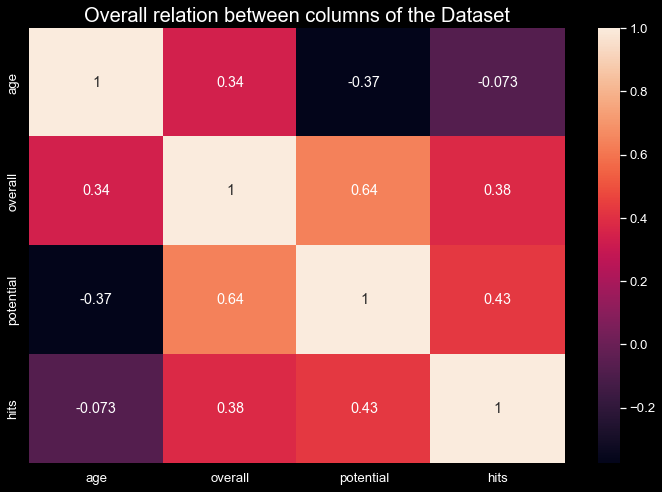

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['age', 'nationality', 'overall', 'potential', 'team', 'hits', 'position']].corr(), annot = True) #overall correlation between the various columns present in our data
plt.title('Overall relation between columns of the Dataset', fontsize = 20)
plt.show()

C:\Users\ELPOP\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


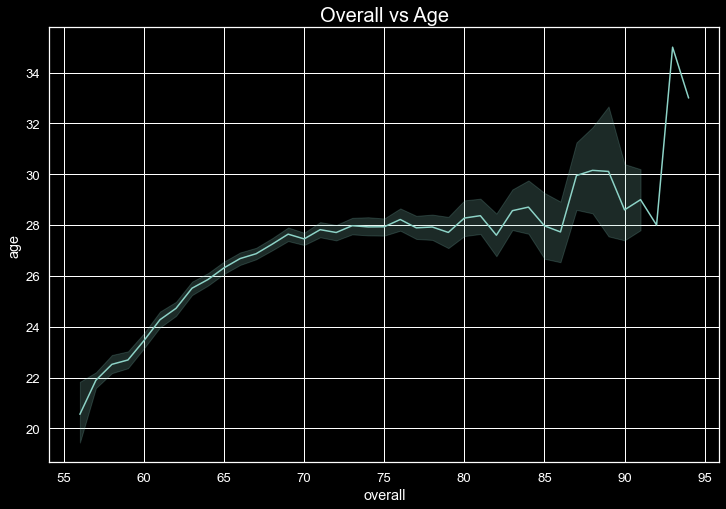

In [48]:
plt.figure(figsize=(12,8)) #comparing overall score of a person versus their age
sns.lineplot(df['overall'], df['age'], palette = "Set1")
plt.title('Overall vs Age', fontsize = 20)
plt.show()

C:\Users\ELPOP\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


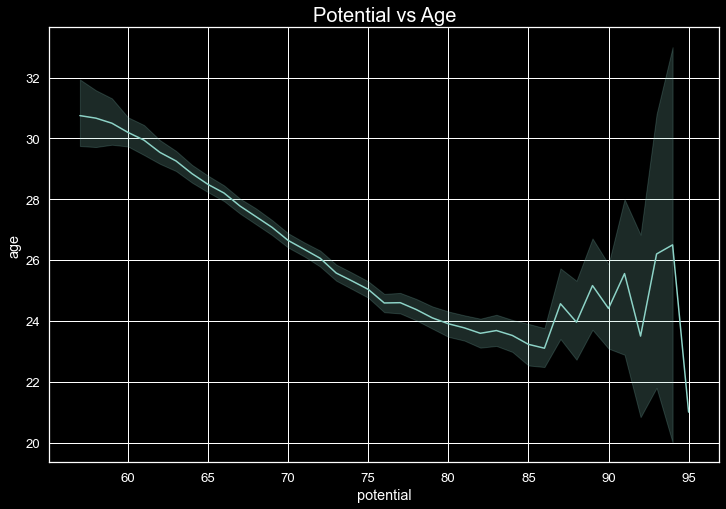

In [49]:
plt.figure(figsize=(12,8)) #comparing potential of a player vs their age
sns.lineplot(df['potential'], df['age'], palette = "Set1")
plt.title('Potential vs Age', fontsize = 20)
plt.show()

In [50]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
rating = pd.DataFrame(df.groupby(['nationality'])['overall'].sum().reset_index())
count = pd.DataFrame(rating.groupby('nationality')['overall'].sum().reset_index())

plot = [go.Choropleth(
            colorscale = 'inferno',
            locationmode = 'country names',
            locations = count['nationality'],
            text = count['nationality'],
            z = count['overall'],
)]

layout = go.Layout(title = 'Country vs Overall Ratings of players belonging to them')

fig = go.Figure(data = plot, layout = layout)
py.iplot(fig)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2   nationality  17981 non-null  object
 3   position     17981 non-null  object
 4   overall      17981 non-null  int64 
 5   age          17981 non-null  int64 
 6   hits         17981 non-null  int64 
 7   potential    17981 non-null  int64 
 8   team         17981 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


# Database

In [86]:
df.drop(['player_id'],axis=1, inplace=True)


KeyError: "['player_id'] not found in axis"

In [87]:
df

name  nationality  position  overall  age  hits  \
0           Lionel Messi    Argentina  ST|CF|RW       94   33   299   
1      Cristiano Ronaldo     Portugal     ST|LW       93   35   276   
2              Neymar Jr       Brazil    CAM|LW       92   28   186   
3        Virgil van Dijk  Netherlands        CB       91   29   127   
4              Jan Oblak     Slovenia        GK       91   27    47   
...                  ...          ...       ...      ...  ...   ...   
17976        Jaime Ortíz      Ecuador        ST       56   21     0   
17977   Michael Carcelén      Ecuador        CM       56   23     0   
17978        Davide Luzi    Venezuela        ST       56   18     1   
17979    Sergio Sulbarán    Venezuela        RW       56   22     0   
17980          Luis Peña    Venezuela        CM       56   18     0   

       potential                         team  
0             94                FC Barcelona   
1             93                    Juventus   
2             92         Paris Saint-Germain   
3             92                   Liverpool   
4             93             Atlético Madrid   
...          ...                          ...  
17976         64    Sociedad Deportiva Aucas   
17977         64  Club Deportivo El Nacional   
17978         68          Zamora Fútbol Club   
17979         62          Zamora Fútbol Club   
17980         69          Zamora Fútbol Club   

[17981 rows x 8 columns]

In [84]:
import sqlite3
connection=sqlite3.connect('Players.db')
c=connection.cursor()

c.execute('CREATE TABLE IF NOT EXISTS CARS (name text, nationality text, position text, overall number,age number,hits number,potential number ,team text )')
connection.commit()

# ML

In [89]:
df = pd.get_dummies(df, columns=['name', 'nationality', 'position',  
       'team'], drop_first=True)
df

overall  age  hits  potential  name_?tefan Târnovanu  \
0           94   33   299         94                      0   
1           93   35   276         93                      0   
2           92   28   186         92                      0   
3           91   29   127         92                      0   
4           91   27    47         93                      0   
...        ...  ...   ...        ...                    ...   
17976       56   21     0         64                      0   
17977       56   23     0         64                      0   
17978       56   18     1         68                      0   
17979       56   22     0         62                      0   
17980       56   18     0         69                      0   

       name_?tefan Vladoiu  name_AJ Leitch-Smith  name_Aapo Halme  \
0                        0                     0                0   
1                        0                     0                0   
2                        0                     0                0   
3                        0                     0                0   
4                        0                     0                0   
...                    ...                   ...              ...   
17976                    0                     0                0   
17977                    0                     0                0   
17978                    0                     0                0   
17979                    0                     0                0   
17980                    0                     0                0   

       name_Aaron Amadi-Holloway  name_Aaron Appindangoye  ...  \
0                              0                        0  ...   
1                              0                        0  ...   
2                              0                        0  ...   
3                              0                        0  ...   
4                              0                        0  ...   
...                          ...                      ...  ...   
17976                          0                        0  ...   
17977                          0                        0  ...   
17978                          0                        0  ...   
17979                          0                        0  ...   
17980                          0                        0  ...   

       team_Wuhan Zall Professional FC   team_Wycombe Wanderers   \
0                                     0                        0   
1                                     0                        0   
2                                     0                        0   
3                                     0                        0   
4                                     0                        0   
...                                 ...                      ...   
17976                                 0                        0   
17977                                 0                        0   
17978                                 0                        0   
17979                                 0                        0   
17980                                 0                        0   

       team_Yeni Malatyaspor   team_Yokohama F·Marinos   team_Zaglebie Lubin   \
0                           0                         0                     0   
1                           0                         0                     0   
2                           0                         0                     0   
3                           0                         0                     0   
4                           0                         0                     0   
...                       ...                       ...                   ...   
17976                       0                         0                     0   
17977                       0                         0                     0   
17978                       0                         0                     0   
1

In [90]:
x = df.drop('potential', axis=1)
y = df['potential']

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [96]:
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = [
     LinearRegression(),
     KNeighborsRegressor(),
     DecisionTreeRegressor(),
     SVR(),
     RandomForestRegressor(), 
     XGBRegressor()
]

for model in models:  
     print(model)
     model.fit(x_train, y_train)
     y_pred = model.predict(x_test)
     print(f'R2: {r2_score(y_test, y_pred) * 100}')
     print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
     print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}\n---------')

LinearRegression()
R2: 40.17122640771033
MAE: 3.7333954258706226
RMSE: 4.663798314038837
---------
KNeighborsRegressor()
R2: -42.734735784822384
MAE: 5.988434806783428
RMSE: 7.203599322746154
---------
DecisionTreeRegressor()
R2: 91.08208810136843
MAE: 1.02418682235196
RMSE: 1.8005960771288825
---------
SVR()
R2: -33.33877044442648
MAE: 5.833201548467066
RMSE: 6.962463538927349
---------
RandomForestRegressor()
R2: 93.8370871843257
MAE: 0.9035001390047263
RMSE: 1.4968480738676562
---------
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random